<a href="https://colab.research.google.com/github/pgellert/workshop-deep-learning/blob/master/Copy_of_Intro_to_Deep_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Deep Learning 2

This is the notebook accompanying the second Hackers at Cambridge Deep Learning workshop.
In this workshop, you'll implement your own *convolutional neural network* using the **Keras** deep learning framework.


First, let's import dependencies:

In [1]:

#import the keras functions
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense
from keras.optimizers import Adam
from  keras.utils import to_categorical as OneHotEncode
from keras import backend as K
#numpy to manipulate arrays
import numpy as np
#to visualise outputs
import matplotlib.pyplot as plt
#import the MNIST dataset
from keras.datasets import mnist



Using TensorFlow backend.


## Reading In the Data:

As in the first workshop, you'll want to load in the data, using a nice **load data()** function.

First, we'll reshape the input x_train and x_test into a *(num_examples, width, height, number of channels)* dimensional array.

For MNIST, the input image is of size 28x28 and it is greyscale so number of channels =1. 

We then want to normalise the values - since pixels are in range [0...255], divide by 255 to get them in range [0...1]

Finally, we want to **one-hot encode** our output labels y_train and y_test.

### Useful Functions:
    A = np.reshape(A, (b,c,d)) # reshapes A into a b x c x d array - (b,c,d) = tuple of dimensions
    
    OneHotEncode(input array, num_classes ) #returns the one hot encoded output
    

In [0]:
  #Load in the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


num_classes = 10
num_train_examples = x_train.shape[0]
num_test_examples = x_test.shape[0]

# reshape array so dims are (num_examples, 28, 28, 1)
x_train = np.reshape(x_train, (num_train_examples, 28, 28, 1))
x_test = np.reshape(x_test, (num_test_examples, 28, 28, 1))

# divide both arrays by 255 (to normalise from [0..255] to [0..1])
x_train= x_train/255
x_test = x_test/255

#one hot encode 
y_train = OneHotEncode(y_train, num_classes)
y_test = OneHotEncode(y_test, num_classes)

## Creating the model:
          
Keras is a high level deep learning framework that makes it really easy to create our own model - in this workshop we will be using the **Sequential API**. 

There are four steps to creating a model in Keras:
 * Define 
 * Compile
 * Fit
 * Evaluate
 
 
 We'll look at each stage in turn:

### Define the model:

This is where we specify the layers in our model.

We are using the Sequential API so to start we'll define the model:

      model = Sequential()
      
This is the base to start on. We can then sequentially add the layers to the model using 

            model.add(layer object)
      
 the layerr objects are either
 
 * Conv2D() (convolution layer) 
 * MaxPooling2D()
 * Flatten() - this takes the output of the last layer and flattens it to pass into a fully-connected layer
 * Dense() - this is a fully-connected layer
 
 so you might have:
 
          model = Sequential()
          model.add(Dense(units=128, activation='relu'))
          model.add(Dense(units=10, activation='softmax'))
 
 and now  *model* would be a 2 layer neural network.
 
 The layers take in different arguments - in the example above Dense() took arguments the number of neurons (128, 10 respectively) and the activation function used. 
 
 To summarise the main arguments passed in: 
       
       input_shape = __ #for the first layer

 
[Conv2D](https://keras.io/layers/convolutional/#conv2d)takes in parameters:

      kernel_size=(f,f) #specifying an fxf filter typically f=1,3,5,7
      strides=(a,a ) #specifying a stride of a (this is typically 1)
      padding='same' # this is either 'same' (zero-pad) or 'valid' (no padding)
      filters=x #x is number of filters
      activation='relu'
      
[MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) has
      
      pool_size=(2, 2) # the size of patch used (2x2 is default for pretty much everything)
      
[Dense](https://keras.io/layers/core/#dense) has 

              units=n # number of neurons in layer
              activation = __ #  'relu', 'softmax', 'sigmoid', 'tanh' are possible activations
              

In [0]:
def initCNN(input_shape, num_classes):
    #initialise a model
    model = model = Sequential()
    model.add(Conv2D(input_shape=input_shape, kernel_size=(3,3),strides=(1,1), padding='same', filters=16, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(kernel_size=(3,3),strides=(1,1), padding='same', filters=32, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    return model



In [4]:
convNet = initCNN(x_train[0].shape, num_classes)
convNet.summary() #print the description of the layers in the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

### Compiling the Model:

This is where we specify the loss function we are using, the optimizer we are using and the metrics we want to track when training, as well as a bunch of other information pertaining to training.

        model.compile(arguments)
        
 where the arguments we are interested in are
 
      loss='categorical_crossentropy',
      optimizer='sgd',
       metrics=['accuracy']
       
       
       
 'sgd' stands for Stochastic Gradient Descent - this is a variant of gradient descent where we feed the training data to the model in **batches** rather than giving it all at once

In [0]:
#compile the model
convNet.compile(loss='categorical_crossentropy',
  optimizer='sgd',
   metrics=['accuracy'])

### Fitting the model

This is where we actually train our model, feel free to alter the hyperparameters (e.g. number of epochs to train it for longer etc.)

      model.fit(x=, y=, epochs=, batch_size=, validation_data=(x_test, y_test))

x, y are the training set

The validation_data argument takes as input the **validation dataset**. Here we have split the dataset into train:test split, however typically we would split into train:validation:test - and the purpose of the validation data is to tune the hyperparameters (so we try to maximise performance on the validation data set).

For today, we'll just use x_test, y_test, though I encourage you (as an extension) to split the data up so you have a separate validation set.


In [6]:
#fit the model 
convNet.fit(x=x_train, y=y_train, epochs=8, batch_size=32, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 14s 234us/step - loss: 0.5368 - acc: 0.8420 - val_loss: 0.2062 - val_acc: 0.9346
Epoch 2/8
60000/60000 [==============================] - 12s 206us/step - loss: 0.1573 - acc: 0.9526 - val_loss: 0.1154 - val_acc: 0.9648
Epoch 3/8
60000/60000 [==============================] - 12s 204us/step - loss: 0.1043 - acc: 0.9688 - val_loss: 0.0774 - val_acc: 0.9761
Epoch 4/8
60000/60000 [==============================] - 12s 205us/step - loss: 0.0816 - acc: 0.9752 - val_loss: 0.0648 - val_acc: 0.9796
Epoch 5/8
60000/60000 [==============================] - 12s 205us/step - loss: 0.0684 - acc: 0.9785 - val_loss: 0.0564 - val_acc: 0.9810
Epoch 6/8
60000/60000 [==============================] - 12s 205us/step - loss: 0.0594 - acc: 0.9819 - val_loss: 0.0545 - val_acc: 0.9821
Epoch 7/8
60000/60000 [==============================] - 12s 203us/step - loss: 0.0526 - acc: 0.9835 - val_loss: 0.0480 - 

### Evaluating the model

Finally, we can use the model.evaluate function to evaluate how well the model has done on the test set. Here x, y are the test set inputs/labels respectively.

        loss, accuracy = model.evaluate(x=, y=)
        
   

In [8]:
# calculate the accuracy
loss, accuracy = convNet.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 1s 80us/step


## Visualise the activations:


If you're curious to see the internals of a CNN, this code prints out the intermediate outputs of the network.

The predicted output is: 7


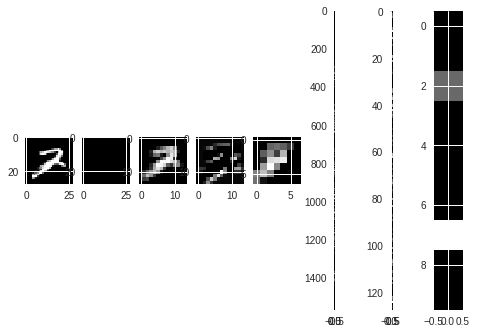

In [10]:
#choose a random integer
image = x_test[np.random.randint(0,x_test.shape[0])]
image = np.reshape(image, (1,28,28,1))

# this is a lambda function that takes input convNet.layers[0].input and returns a list of the outputs for each of the layers.
get_layers_outputs = K.function([convNet.layers[0].input],
                                  [convNet.layers[i].output for i in range(len(convNet.layers))])


layers_outputs = get_layers_outputs([image])


#plot the outputs
fig, ax = plt.subplots(1,1+len(layers_outputs))
ax[0].imshow(image[0,:,:,0], cmap='gray')

for i, output in enumerate(layers_outputs):
  if len(output.shape)==4:
    #pick random activation map
    ax[i+1].imshow(output[0,:,:,np.random.randint(0,output.shape[-1])], cmap='gray')
  else: #dense layer
    ax[i+1].imshow(output.T,cmap='gray')

print("The predicted output is: " + str(np.argmax(convNet.predict(image))))